<img src = "https://evangsmailoa.files.wordpress.com/2019/09/ml.png"  align = "center">

#<h1>Selamat datang!</h1>

Ada beberapa model untuk **clustering**. Untuk yang pertama kita pelajari tentang model **K-means**. Model ini cocok untuk mencari secara cepat <b>insights</b> dari <b>unlabeled data</b>. Terdapat 2 contoh penggunaan **clustering** k-Means:
- k-means dalam dataset yang random (acak), dan
- penggunaan k-means untuk segmentasi customer

<p>Selamat belajar!</p> 

### Import libraries

In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# <center>k-Means dengan dataset random</center>
Untuk contoh, kita akan buat dataset sendiri ya...
<p> Hal pertama, kita butuh buat data random. Kita gunakan fungsi <b>numpy's random.seed()</b>, nanti di set ke <b>0</b>


In [ ]:
np.random.seed(0)

Selanjutnya kita buat <b><i> random clusters </i></b> yang kita simpan ke kelas <b> make_blobs </b>. Nah kelas ini mampu menampung banyak inputan, tapi nanti kita setting sesuai kebutuhan kita. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: Total banyaknya titik untuk nantinya akan di-cluster. </li>
    <ul> <li> Nilai: 5000 </li> </ul>
    <li> <b>centers</b>: Total pusat (center). </li>
    <ul> <li> Nilai: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: Standar deviasi dari cluster. </li>
    <ul> <li> Nilai: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array dari [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> Nanti di-generated otomatis dari sampel. </li> </ul> 
    <li> <b>y</b>: Array dari [n_samples]. (Response Vector)</li>
    <ul> <li> Label untuk pengelompokan tiap sampel.</li> </ul>
</ul>


In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Tampilkan data titik-titik dalam bentuk scatter plot yang di-generated secara  random.

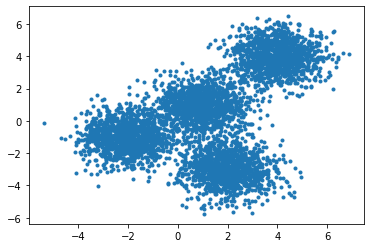

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Set-up K-Means
Nah sekarang kita sudah punya data random, selanjutnya data tersebut kita olah dengan model K-Means Clustering. KMeans punya beberapa parameter yang dapat digunakan, tapi kita gunakan 3 saja ya:
<ul>
    <li> <b>init</b>: Inisialisasi <b>centroid</b> </li>
    <ul>
        <li> Nilai: "k-means++" </li>
        <li> k-means++: Untuk pilih pusat dari cluster.</li>
    </ul>
    <li> <b>n\_clusters</b>: Banyaknya cluster menentukan banyaknya centroid yang harus dibuat. </li>
    <ul> <li> Nilai: 4 (soalnya kita setting 4 pusat centroid)</li> </ul>
    <li> <b>n\_init</b>: Banyaknya waktu algoritma k-means run di setiap centroid yang berbeda. Hasil final sebagai opsi terbaik. </li>
    <ul> <li> Nilai: 12 </li> </ul>
</ul>

Output parameter kita panggil <b>k_means</b>.

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [ ]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Sekarang kita buat label untuk masing-masing point yang menggunakan atribut KMeans' <b> .labels\_ </b> kemudian kita simpan sebagai <b> k_means_labels </b> 

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

Kemudian kita ambil koordinat dari pusat cluster dengan atribut KMeans' <b> .cluster&#95;centers&#95; </b> kemudian disimpan sebagai <b> k_means_cluster_centers </b>

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

## Buat Plot Visualisasi
Nah setelah data-data tersebut (data random tadi) diolah dengan model KMeans, sekarang kita tampilkan dalam bentuk plot visualisasi yang indah!

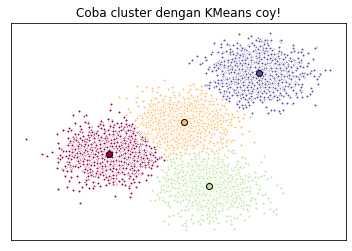

In [ ]:
# Inisialisasi plot dengan dimensi 4
fig = plt.figure(figsize=(6, 4))

# Mewarnai dengan "color map". 
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Buat plot
ax = fig.add_subplot(1, 1, 1)

# Lakukan looping plot dengan data-data dan centroid-nya masing-masing.
# k antara 0-3.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Buat list dari semua data point, dimana data-data tersebut 
    # ada dalam cluster (misal. cluster 0) yang dilabeli TRUE, selain itu
    # dilabeli FALSE.
    my_members = (k_means_labels == k)
    
    # Tentukan/definisikan centroid, atau pusat cluster (center).
    cluster_center = k_means_cluster_centers[k]
    
    # Plot-kan datapoint dengan warna.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plot-kan centroid dengan warna tertentu, sebaiknya pakai warna gelap
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Judul Plot
ax.set_title('Coba cluster dengan KMeans coy!')

# Hapus sumbu X
ax.set_xticks(())

# Hapus sumbu Y
ax.set_yticks(())

# Tampilkan!
plt.show()

## Tugas 1 (10%)
Kawan2, silakan buat clustering dengan k = 5 dan untuk 5 centroid-nya silakan buat sesuka hati. Nilai datanya random ya... dengan banyaknya data 10000. Nah buat warna warni untuk kelima cluster tersebut dan centroid harus diberi warna yang berbeda. Silakan dikumpulkan dalam bentuk NIM.py contoh 672018001.py (Cek GClass ya...)

In [ ]:
# write your code here

# Pengelompokan Customer dengan K-Means
Misalkan kita punya dataset customer, kemudian kita pingin kelompokkan customer-customer berdasarkan data historical mereka. Nah kita kelompokkan mereka berdasarkan karakteristik yang mirip. Contoh, kelompok satu untuk customer yang punya high-profit dan low-risk, misalkan, mereka lebih suka beli produk. Kelompok lain berisi customer dari organisasi non-profit (NGO), dan lain sebagainya.

Nah untuk kasus ini, kita butuh untuk download contoh dataset. Untuk download kita gunakan **`!wget`**. Datasetnya kita ambil dari IBM Object Storage.  

In [ ]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-09-28 03:42:00--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2020-09-28 03:42:00 (2.08 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



### Load Data dari file CSV  
Sebelum datanya dapat kita gunakan, kita harus gunakan alamat url untuk ambil  Cust_Segmentation.csv.

In [ ]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


### Pre-processing

Seperti yang kita lihat, __Address__ dalam dataset adalah variabel categorical. Nah algoritma k-means kan tidak dapat diterapkan ke variabel categorical soalnya fungsi Euclidean kan untuk variabel discrete. Makanya, kita harus buang fitur **Address** sebelum jalankan clustering.

In [ ]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalisasi dengan standar deviasi
Oke, mari lakukan normalisasi untuk dataset yang ada. Kita gunakan __StandardScaler()__ untuk normalisasi dataset kita.

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Pemodelan

Sekarang kita panggil k-means untuk diterapkan pada dataset kita.

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

### Insights
Kita tentukan label dari setiap baris dalam dataframe.

In [ ]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Nah kita dapat melakukan cek dengan mudah nilai centroid dengan mendapatkan rata-rata dari setiap fitur yang ada dalam masing-masing cluster.

In [ ]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Sekarang tinggal lihat distribusi dari customer berdasarkan age (umur) dan income (pendapatan):

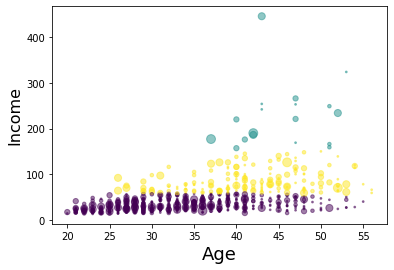

In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


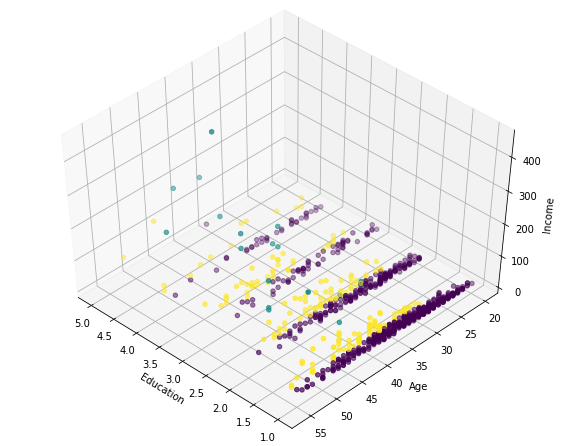

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


# <h2 id="(c)">(c)</h2>
<p>Copyright &copy; 2019 <b>Evangs Mailoa</b>.</p>

---


<p>Digunakan khusus untuk ngajar Machine Learning di Progdi Teknik Informatika - FTI UKSW</p>